# Report for different number of phases 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

def load(filename: str):
    with open(filename, 'rb') as file:
        obj = pkl.load(file)
    return obj

def plot(y: dict, t: int, n: int, scale: dict = None, log = 'y'):
    for i in range(n):
        plt.figure()
        if scale is None:
            for key in loss:
                plt.plot(loss[key][0:t, i])
            plt.xlabel('epoch')
        else:
            for key in loss:
                plt.plot(np.arange(t) * scale[key], loss[key][0:t, i])
            plt.xlabel('scaled epoch')
        plt.ylabel('loss')
        plt.legend(loss.keys())
        if 'y' in log: plt.yscale('log')
        if 'x' in log: plt.xscale('log')
        
        

## On relu + glorot_normal (aka. Xavier) initializer

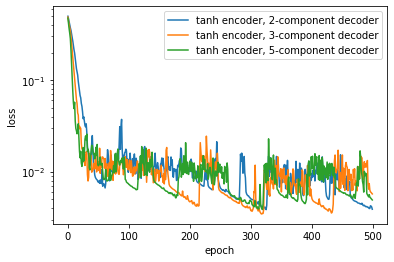

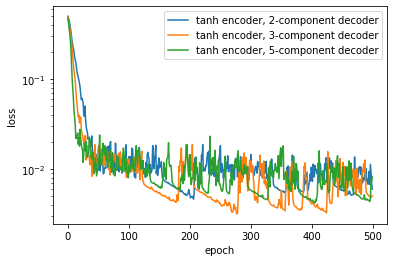

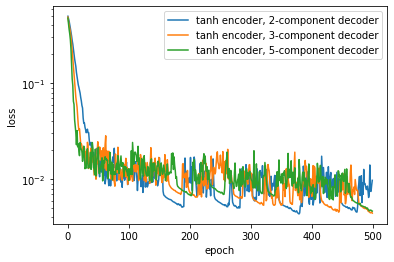

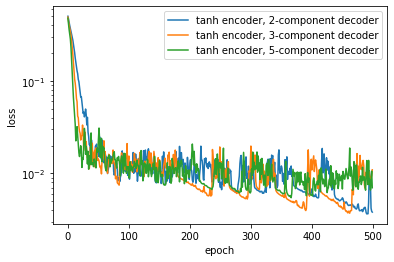

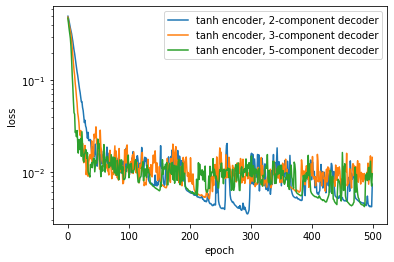

In [52]:
a = [load(f'comp-2-tanh-glorot-norm-seed-{i}.pkl') for i in range(5)]
b = [load(f'comp-3-tanh-glorot-norm-seed-{i}.pkl') for i in range(5)]
c = [load(f'comp-5-tanh-glorot-norm-seed-{i}.pkl') for i in range(5)]

loss = {'tanh encoder, 2-component decoder': np.array([i['loss'] for i in a]).T, 
        'tanh encoder, 3-component decoder': np.array([i['loss'] for i in b]).T,
        'tanh encoder, 5-component decoder': np.array([i['loss'] for i in c]).T}

plot(loss, 500, 5)

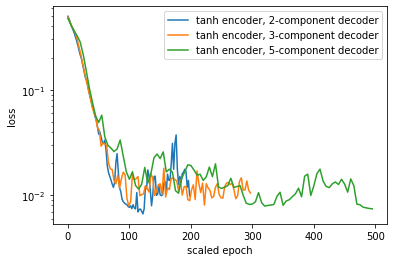

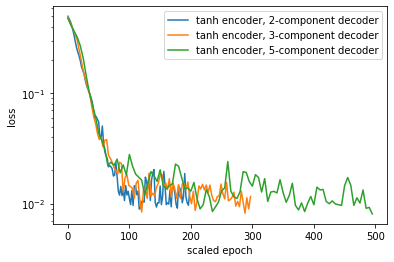

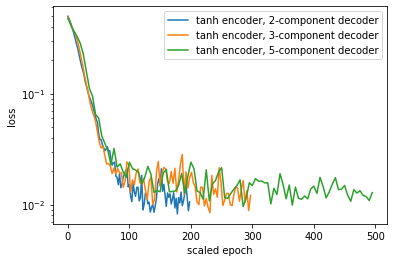

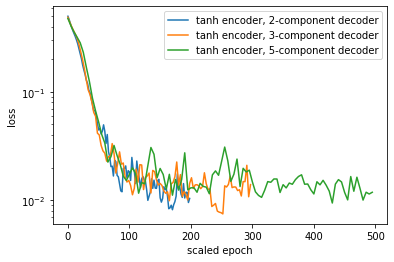

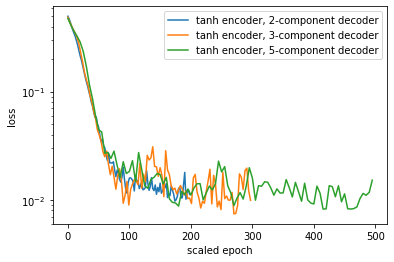

In [51]:
scale = {'tanh encoder, 2-component decoder': 2, 
         'tanh encoder, 3-component decoder': 3,
         'tanh encoder, 5-component decoder': 5}


plot(loss, 100, 5, scale)

## On selu + lecun_normal 

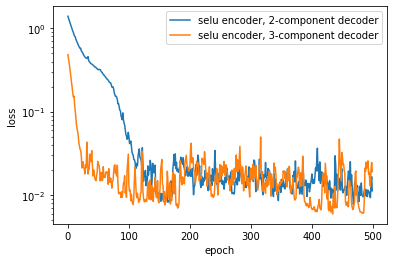

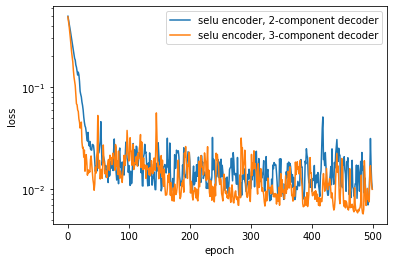

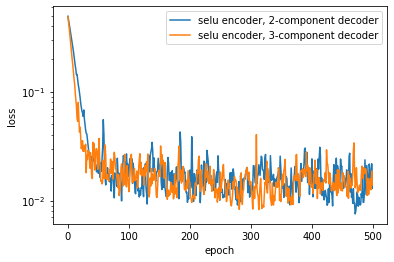

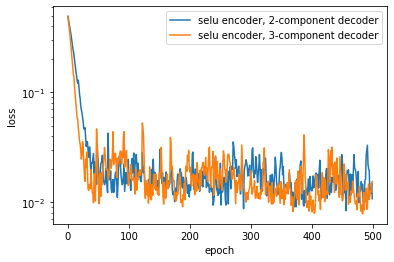

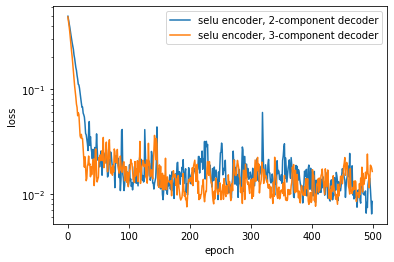

In [39]:
a = [load(f'comp-2-selu-lecun-norm-seed-{i}.pkl') for i in range(5)]
b = [load(f'comp-3-selu-lecun-norm-seed-{i}.pkl') for i in range(5)]

loss = {'selu encoder, 2-component decoder': np.array([i['loss'] for i in a]).T, 
        'selu encoder, 3-component decoder': np.array([i['loss'] for i in b]).T}

plot(loss, 500, 5)

## selu + lecun_normal v. tanh + glorot v. relu + he

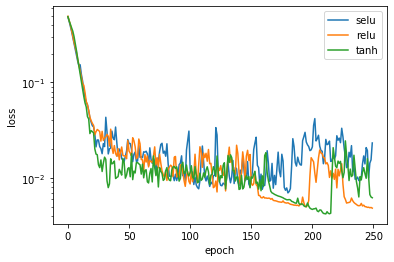

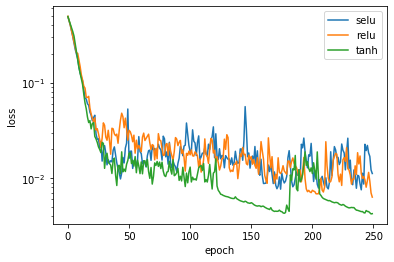

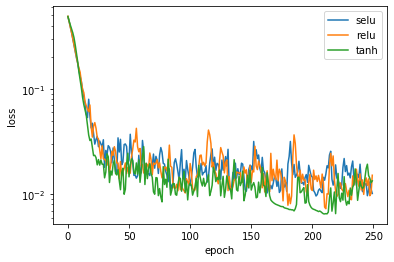

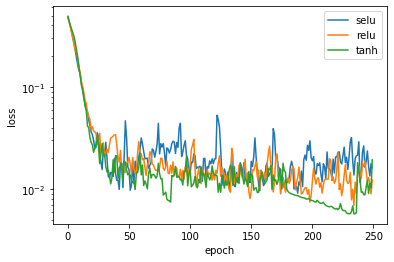

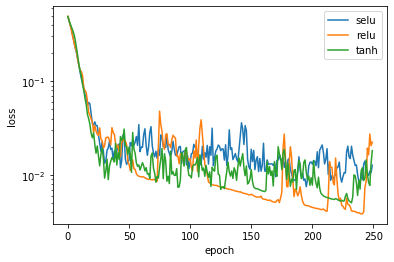

In [49]:
a = [load(f'comp-3-selu-lecun-norm-seed-{i}.pkl') for i in range(5)]
b = [load(f'comp-3-relu-he-norm-seed-{i}.pkl') for i in range(5)]
c = [load(f'comp-3-tanh-glorot-norm-seed-{i}.pkl') for i in range(5)]

loss = {'selu': np.array([i['loss'] for i in a]).T,
        'relu': np.array([i['loss'] for i in b]).T,
        'tanh': np.array([i['loss'] for i in c]).T}

plot(loss, 250, 5)

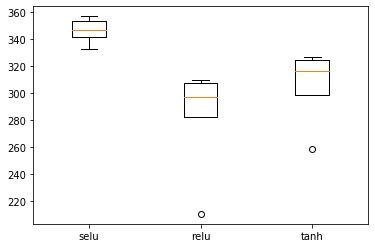

In [47]:
a = [load(f'comp-3-selu-lecun-norm-seed-{i}.pkl') for i in range(5)]
b = [load(f'comp-3-relu-he-norm-seed-{i}.pkl') for i in range(5)]
c = [load(f'comp-3-tanh-glorot-norm-seed-{i}.pkl') for i in range(5)]

consumption = {'selu': np.array([i['time'][-1] for i in a]).T,
               'relu': np.array([i['time'][-1] for i in b]).T,
               'tanh': np.array([i['time'][-1] for i in c]).T}

labels, data = consumption.keys(), consumption.values()

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()